# Comparación entre The Tell-Tale Heart (Poe) y The Yellow Wallpaper (Gilman)

**Hecho por:** Sofía Quiroz Valencia 

El presente notebook realiza un análisis comparativo de dos textos literarios clásicos: 
**“The Tell-Tale Heart”** de *Edgar Allan Poe* y **“The Yellow Wallpaper”** de *Charlotte Perkins Gilman*.  
El objetivo es aplicar técnicas de **minería de texto y procesamiento del lenguaje natural (NLP)** utilizando la librería **spaCy**.

A lo largo del trabajo se llevan a cabo tareas de:
- Normalización y limpieza de texto.  
- Tokenización, eliminación de stopwords y lematización.  
- Identificación de categorías gramaticales (POS tagging).  
- Extracción de tripletas Sujeto-Verbo-Objeto (SVO).  
- Generación de nubes de palabras y análisis de frecuencia.

El análisis busca observar diferencias en el **estilo, complejidad y temas dominantes** en ambos textos, permitiendo interpretar los rasgos lingüísticos que caracterizan la escritura de cada autor.

In [30]:
#Importar y Configurar
import os
import re
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

# Procesamiento de texto
import spacy
from wordcloud import WordCloud
from docx import Document

# Análisis de sentimientos y texto
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
#Configuraciones Iniciales
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Cargar modelo de spaCy en inglés
nlp = spacy.load("en_core_web_sm")

# Configurar gráficos
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 14

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sofia\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sofia\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [33]:
#Cargar los Textos 
ruta_base = r"C:\Documentos\SEXTO SEMESTRE\Ciencia de Datos"

def cargar_docx(nombre_archivo):
    doc = Document(os.path.join(ruta_base, nombre_archivo))
    texto = "\n".join([p.text for p in doc.paragraphs])
    return texto

texto_poe = cargar_docx("THE TELL.docx")
texto_gilman = cargar_docx("The Yellow Wallpaper.docx")


In [34]:
#Limpieza y Normalización
def limpiar_texto(texto):
    texto = re.sub(r"http\S+|www\S+", "", texto)
    texto = re.sub(r"<.*?>", "", texto)
    texto = re.sub(r"[^\w\s]", "", texto)
    texto = re.sub(r"\s+", " ", texto)
    texto = texto.lower()
    return texto.strip()

texto_poe_limpio = limpiar_texto(texto_poe)
texto_gilman_limpio = limpiar_texto(texto_gilman)

print("✅ Limpieza completada.")

✅ Limpieza completada.


In [35]:
#Analisis Básico
def describir_texto(texto):
    parrafos = texto.count("\n") + 1
    frases = texto.count(".") + texto.count("?") + texto.count("!")
    palabras = len(texto.split())
    return parrafos, frases, palabras

parrafos_poe, frases_poe, palabras_poe = describir_texto(texto_poe)
parrafos_gilman, frases_gilman, palabras_gilman = describir_texto(texto_gilman)

print("📊 DESCRIPCIÓN BÁSICA")
print(f"Poe - Párrafos: {parrafos_poe}, Frases: {frases_poe}, Palabras: {palabras_poe}")
print(f"Gilman - Párrafos: {parrafos_gilman}, Frases: {frases_gilman}, Palabras: {palabras_gilman}")

📊 DESCRIPCIÓN BÁSICA
Poe - Párrafos: 20, Frases: 172, Palabras: 2079
Gilman - Párrafos: 272, Frases: 396, Palabras: 6094


In [36]:
# TOKENIZACIÓN, LEMATIZACIÓN Y STOPWORDS
def procesar_texto(texto):
    doc = nlp(texto)
    tokens = [token.lemma_ for token in doc 
              if not token.is_stop and token.is_alpha]
    return tokens

tokens_poe = procesar_texto(texto_poe_limpio)
tokens_gilman = procesar_texto(texto_gilman_limpio)

print("✅ Tokenización y lematización completas.")

✅ Tokenización y lematización completas.


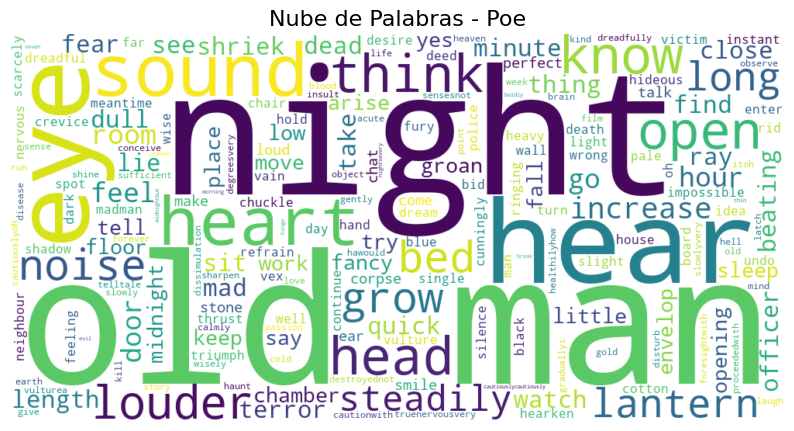

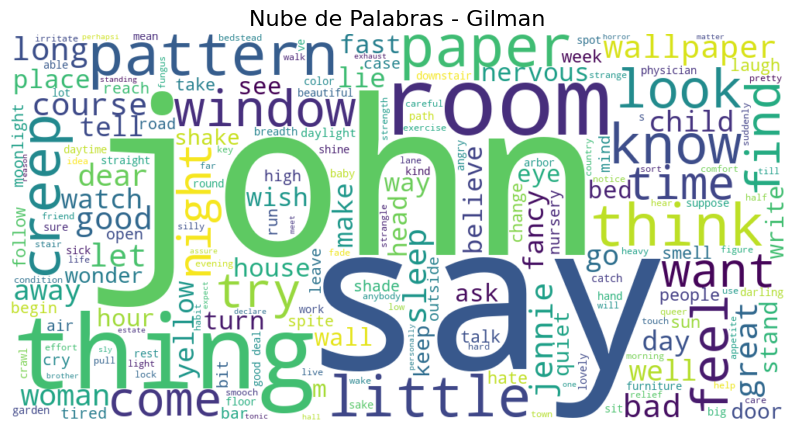

In [37]:
#Nube de Palabras
def nube_palabras(tokens, titulo):
    texto = " ".join(tokens)
    nube = WordCloud(width=1000, height=500, background_color='white').generate(texto)
    plt.imshow(nube, interpolation='bilinear')
    plt.axis("off")
    plt.title(titulo, fontsize=16)
    plt.show()

nube_palabras(tokens_poe, "Nube de Palabras - Poe")
nube_palabras(tokens_gilman, "Nube de Palabras - Gilman")

In [38]:
#Etiquetado Gramatical y Frecuencial
def etiquetas_frecuentes(texto, etiqueta):
    doc = nlp(texto)
    palabras = [token.lemma_ for token in doc 
                if token.pos_ == etiqueta and not token.is_stop]
    return Counter(palabras).most_common(10)

print("🔠 Sustantivos más frecuentes:")
print("Poe:", etiquetas_frecuentes(texto_poe, "NOUN"))
print("Gilman:", etiquetas_frecuentes(texto_gilman, "NOUN"))

print("\n⚙️ Verbos más frecuentes:")
print("Poe:", etiquetas_frecuentes(texto_poe, "VERB"))
print("Gilman:", etiquetas_frecuentes(texto_gilman, "VERB"))

print("\n🎨 Adjetivos más frecuentes:")
print("Poe:", etiquetas_frecuentes(texto_poe, "ADJ"))
print("Gilman:", etiquetas_frecuentes(texto_gilman, "ADJ"))

🔠 Sustantivos más frecuentes:
Poe: [('man', 17), ('night', 14), ('eye', 10), ('sound', 9), ('head', 8), ('bed', 7), ('heart', 7), ('noise', 7), ('door', 5), ('lantern', 5)]
Gilman: [('thing', 26), ('room', 25), ('pattern', 24), ('paper', 22), ('window', 17), ('night', 14), ('time', 13), ('wallpaper', 12), ('woman', 11), ('house', 10)]

⚙️ Verbos más frecuentes:
Poe: [('hear', 13), ('think', 8), ('know', 8), ('open', 7), ('grow', 7), ('increase', 7), ('feel', 6), ('go', 5), ('see', 4), ('take', 4)]
Gilman: [('say', 41), ('think', 22), ('know', 19), ('creep', 19), ('get', 18), ('feel', 16), ('want', 14), ('come', 14), ('look', 14), ('try', 14)]

🎨 Adjetivos más frecuentes:
Poe: [('old', 15), ('mad', 4), ('little', 4), ('dead', 4), ('open', 3), ('perfect', 3), ('dull', 3), ('quick', 3), ('nervous', 2), ('impossible', 2)]
Gilman: [('little', 19), ('good', 16), ('bad', 13), ('great', 12), ('long', 9), ('nervous', 8), ('dear', 8), ('well', 8), ('quiet', 7), ('round', 6)]


In [39]:
#Sujeto- Verbo- Objeto
def extraer_svo(doc):
    svos = []
    for sent in doc.sents:
        subj = ""
        verb = ""
        obj = ""
        for token in sent:
            if "subj" in token.dep_:
                subj = token.text
            if token.pos_ == "VERB":
                verb = token.text
            if "obj" in token.dep_:
                obj = token.text
        if subj and verb and obj:
            svos.append((subj, verb, obj))
    return svos[:10]

doc_poe = nlp(texto_poe)
doc_gilman = nlp(texto_gilman)

print("🧩 Ejemplos de tripletas SVO - Poe")
print(extraer_svo(doc_poe))

print("\n🧩 Ejemplos de tripletas SVO - Gilman")
print(extraer_svo(doc_gilman))

🧩 Ejemplos de tripletas SVO - Poe
[('disease', 'dulled', 'them'), ('I', 'heard', 'earth'), ('I', 'heard', 'hell'), ('I', 'tell', 'story'), ('it', 'haunted', 'me'), ('I', 'loved', 'man'), ('He', 'wronged', 'me'), ('He', 'given', 'insult'), ('I', 'had', 'desire'), ('He', 'had', 'it')]

🧩 Ejemplos de tripletas SVO - Gilman
[('people', 'secure', 'summer'), ('that', 'asking', 'fate'), ('I', 'is', 'it'), ('one', 'expects', 'marriage'), ('he', 'put', 'figures'), ('I', 'get', 'mind)—perhaps'), ('one', 'do', 'what'), ('one', 'do', 'depression'), ('he', 'says', 'thing'), ('I', 'work', 'phosphates')]


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sofia\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sofia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



📈 Sentimiento promedio de los textos:
Poe: -0.066
Gilman: 0.075


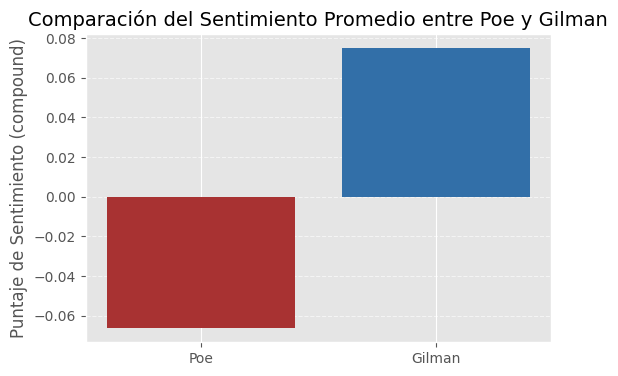

In [ ]:
# Descargar recursos necesarios
import nltk
nltk.download('punkt_tab')
nltk.download('vader_lexicon')

# Análisis de sentimiento
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def sentimiento_promedio(texto):
    """Calcula el promedio del sentimiento compuesto de un texto."""
    oraciones = nltk.sent_tokenize(texto)
    puntajes = []
    for sent in oraciones:
        if sent.strip():
            score = sia.polarity_scores(sent)["compound"]
            puntajes.append(score)
    if len(puntajes) == 0:
        return 0
    return sum(puntajes) / len(puntajes)

# Calcular sentimiento promedio para cada texto
sent_poe = sentimiento_promedio(texto_poe)
sent_gilman = sentimiento_promedio(texto_gilman)

print("\n📈 Sentimiento promedio de los textos:")
print(f"Poe: {sent_poe:.3f}")
print(f"Gilman: {sent_gilman:.3f}")

# Visualización del sentimiento
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(["Poe", "Gilman"], [sent_poe, sent_gilman], color=["#a83232", "#326fa8"])
plt.title("Comparación del Sentimiento Promedio entre Poe y Gilman")
plt.ylabel("Puntaje de Sentimiento (compound)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


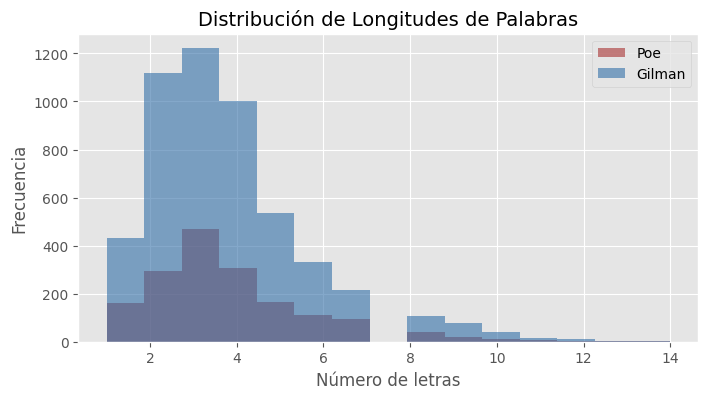

In [51]:
#Distribución de longitudes de palabras
import numpy as np

def longitudes_palabras(texto):
    palabras = [len(p) for p in texto.split() if p.isalpha()]
    return palabras

long_poe = longitudes_palabras(texto_poe)
long_gilman = longitudes_palabras(texto_gilman)

plt.figure(figsize=(8,4))
plt.hist(long_poe, bins=15, alpha=0.6, label="Poe", color="#a83232")
plt.hist(long_gilman, bins=15, alpha=0.6, label="Gilman", color="#326fa8")
plt.title("Distribución de Longitudes de Palabras")
plt.xlabel("Número de letras")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


In [52]:
#Densidad léxica (riqueza de vocabulario)
def densidad_lexica(texto):
    palabras = [p.lower() for p in texto.split() if p.isalpha()]
    return len(set(palabras)) / len(palabras)

print("📚 Densidad léxica:")
print(f"Poe: {densidad_lexica(texto_poe):.3f}")
print(f"Gilman: {densidad_lexica(texto_gilman):.3f}")


📚 Densidad léxica:
Poe: 0.292
Gilman: 0.191


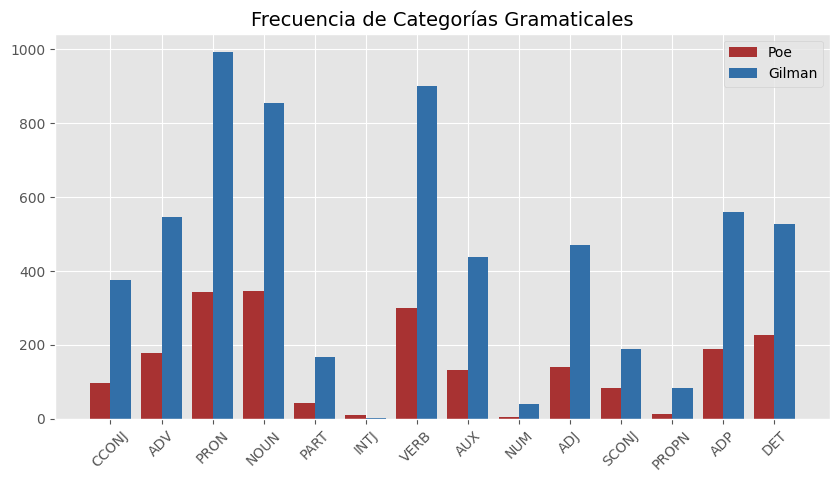

In [53]:
#Frecuencia de categorías gramaticales (POS)
def categorias_pos(doc):
    pos_counts = Counter([token.pos_ for token in doc if token.is_alpha])
    return pos_counts

doc_poe = nlp(texto_poe)
doc_gilman = nlp(texto_gilman)

pos_poe = categorias_pos(doc_poe)
pos_gilman = categorias_pos(doc_gilman)

labels = list(set(pos_poe.keys()) | set(pos_gilman.keys()))
poe_vals = [pos_poe.get(l, 0) for l in labels]
gilman_vals = [pos_gilman.get(l, 0) for l in labels]

plt.figure(figsize=(10,5))
x = np.arange(len(labels))
plt.bar(x - 0.2, poe_vals, width=0.4, label="Poe", color="#a83232")
plt.bar(x + 0.2, gilman_vals, width=0.4, label="Gilman", color="#326fa8")
plt.xticks(x, labels, rotation=45)
plt.title("Frecuencia de Categorías Gramaticales")
plt.legend()
plt.show()


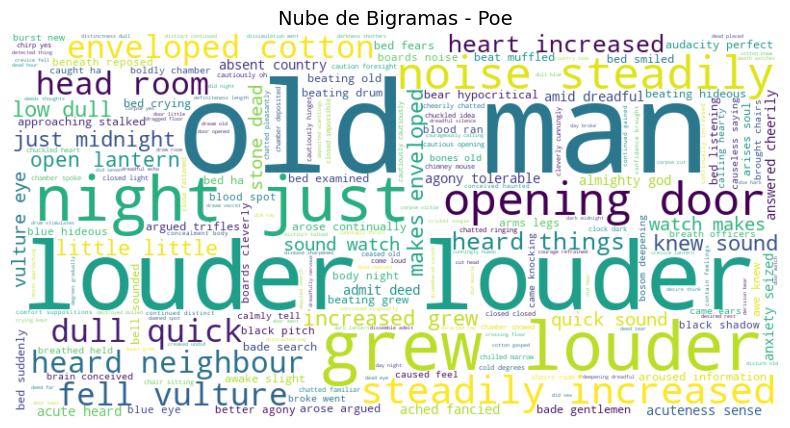

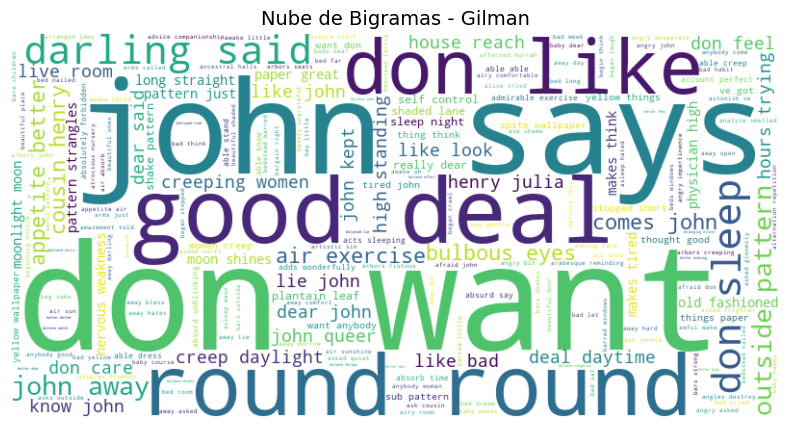

In [54]:
#Nube de bigramas (pares de palabras frecuentes)
from sklearn.feature_extraction.text import CountVectorizer

def nubes_bigramas(texto, titulo):
    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit([texto])
    bag = vec.transform([texto]).toarray()
    freqs = dict(zip(vec.get_feature_names_out(), bag[0]))
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freqs)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(titulo)
    plt.show()

nubes_bigramas(texto_poe, "Nube de Bigramas - Poe")
nubes_bigramas(texto_gilman, "Nube de Bigramas - Gilman")


In [62]:
#Comparación de emociones (alegría, tristeza, miedo, enojo)
from textblob import TextBlob
def emociones_texto(texto):
    blob = TextBlob(texto)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

emo_poe = emociones_texto(texto_poe)
emo_gilman = emociones_texto(texto_gilman)

print("💬 Emociones (Polaridad y Subjetividad):")
print(f"Poe: Polaridad={emo_poe[0]:.3f}, Subjetividad={emo_poe[1]:.3f}")
print(f"Gilman: Polaridad={emo_gilman[0]:.3f}, Subjetividad={emo_gilman[1]:.3f}")


💬 Emociones (Polaridad y Subjetividad):
Poe: Polaridad=0.090, Subjetividad=0.520
Gilman: Polaridad=0.057, Subjetividad=0.533
